# Advanced methods in R


Now you should be familiar with the basics of how to access NetCDF files. To move forward with the next examples make sure that you have run the following commands:

In [1]:
library('ncdf4')
data_url <- 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc'

nc <- nc_open(data_url)
time.data <- ncvar_get(nc, 'time')
time <- as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

## Finding rainy days

In [2]:
Rain = ncvar_get(nc, 'Rain_mm_3_Tot')

In [4]:
# use the library xts to facilitate date handling
library(xts)

# create a dataframe object
df = data.frame(row.names=time,Rain)

# create a xts matrix, slice it, and plot it
ts <- as.xts(df, dateFormat = "POSIXct")

# resample to daily taking the sum
daily.rain = apply.daily(ts, sum)

# convert to a dataframe and add a time column
df <- data.frame(daily.rain)
df$time = row.names(df)

# sort by rain in reverse order (highest first)
sorted = df[with(df, order(-Rain)), ]

# print the top of the data.frame to check it out
head(sorted)

,Rain,time
2011-08-28 23:00:00,187.442,2011-08-28 23:00:00
2011-08-14 23:00:00,133.86,2011-08-14 23:00:00
2014-04-30 23:00:00,70.614,2014-04-30 23:00:00
2013-11-27 23:00:00,70.36,2013-11-27 23:00:00
2011-07-03 23:00:00,65.534,2011-07-03 23:00:00
2011-09-06 23:00:00,64.264,2011-09-06 23:00:00


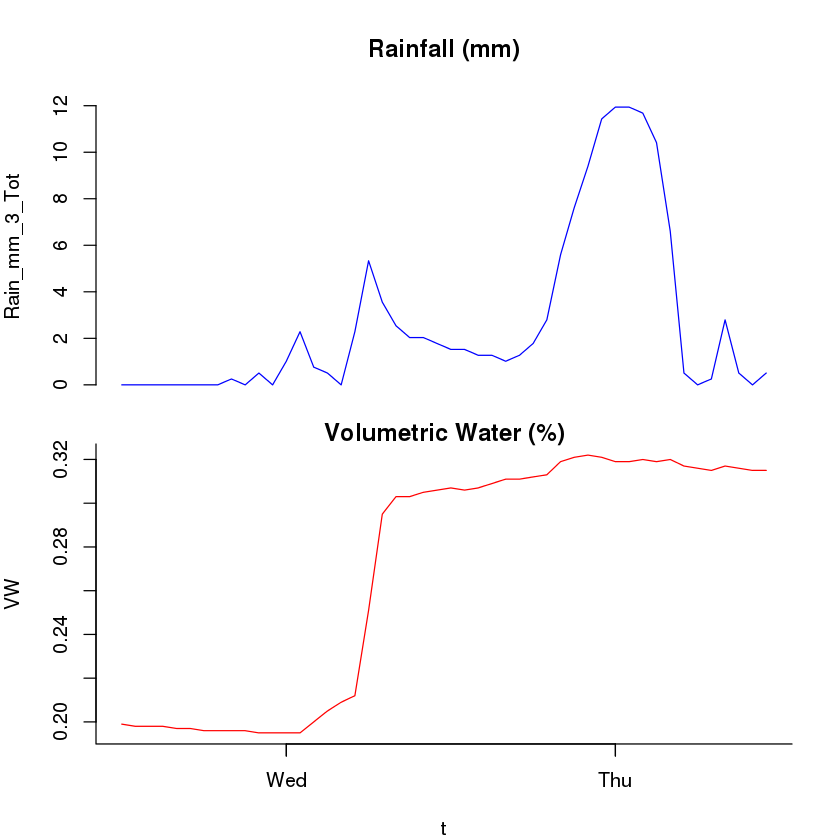

In [7]:
source('select.R')

rain <- select('butler','Rain_mm_3_Tot', "2014-04-29 12:00", "2014-05-01 12:00")
vw <- select('butler','VW', "2014-04-29 12:00", "2014-05-01 12:00")

layout(matrix(1:2, ncol = 1))

par(mar = c(1, 4, 4, 2))
with(rain, plot(Rain_mm_3_Tot~t, type = 'l', col='blue', xaxt = 'n', bty="n", main = 'Rainfall (mm)'))

par(mar = c(4, 4, 1, 2))
with(vw, plot(VW~t, type = 'l', col='red', bty = "l", main = 'Volumetric Water (%)'))

## Rain on wet soil

## Monthly rainfall